# EDA & Modelling

## Package loading

In [1]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot


2022-07-13 16:43:23.790429: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-13 16:43:23.790464: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'regression'

In [3]:
data_size = 'small'

In [4]:
df = pd.read_csv('/home/phbillet/Documents/python project/EZStacking/dataset/concrete_miss.csv')

In [5]:
target_col = 'Strength'

#### Thresholds

In [6]:
threshold_NaN = 0.5

In [7]:
threshold_cat = 5

In [8]:
threshold_Z = 3.0

In [9]:
test_size = 0.33

In [10]:
threshold_entropy = 0.75

In [11]:
undersampling = False

In [12]:
undersampler = 'Random'

In [13]:
threshold_corr = 0.95

In [14]:
threshold_model = 5

In [15]:
threshold_score = 0.7

In [16]:
threshold_feature = 5

#### Drop user's columns:

In [17]:
user_drop_cols = []

Dataset before deletion

In [18]:
display(df)

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  \
0      540.0               0.0     0.0  162.0               2.5   
1      540.0               0.0     0.0  162.0               2.5   
2      332.5             142.5     0.0  228.0               0.0   
3      332.5             142.5     0.0  228.0               0.0   
4      198.6               NaN     0.0  192.0               0.0   
...      ...               ...     ...    ...               ...   
1025   276.4             116.0    90.3  179.6               8.9   
1026   322.2               0.0   115.6  196.0              10.4   
1027   148.5             139.4   108.6  192.7               6.1   
1028   159.1             186.7     0.0  175.6              11.3   
1029   260.9             100.5    78.3  200.6               8.6   

      CoarseAggregate  FineAggregate  Age   Strength  
0              1040.0          676.0   28  79.986111  
1              1055.0          676.0   28  61.887366  
2               932.0          594.0  270  40.269535  
3               932.0          594.0  365  41.052780  
4               978.4          825.5  360  44.296075  
...               ...            ...  ...        ...  
1025            870.1          768.3   28  44.284354  
1026            817.9          813.4   28  31.178794  
1027            892.4          780.0   28  23.696601  
1028            989.6          788.9   28  32.768036  
1029            864.5          761.5   28  32.401235  

[1030 rows x 9 columns]

In [19]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [20]:
display(df)

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  \
0      540.0               0.0     0.0  162.0               2.5   
1      540.0               0.0     0.0  162.0               2.5   
2      332.5             142.5     0.0  228.0               0.0   
3      332.5             142.5     0.0  228.0               0.0   
4      198.6               NaN     0.0  192.0               0.0   
...      ...               ...     ...    ...               ...   
1025   276.4             116.0    90.3  179.6               8.9   
1026   322.2               0.0   115.6  196.0              10.4   
1027   148.5             139.4   108.6  192.7               6.1   
1028   159.1             186.7     0.0  175.6              11.3   
1029   260.9             100.5    78.3  200.6               8.6   

      CoarseAggregate  FineAggregate  Age   Strength  
0              1040.0          676.0   28  79.986111  
1              1055.0          676.0   28  61.887366  
2               932.0          594.0  270  40.269535  
3               932.0          594.0  365  41.052780  
4               978.4          825.5  360  44.296075  
...               ...            ...  ...        ...  
1025            870.1          768.3   28  44.284354  
1026            817.9          813.4   28  31.178794  
1027            892.4          780.0   28  23.696601  
1028            989.6          788.9   28  32.768036  
1029            864.5          761.5   28  32.401235  

[1030 rows x 9 columns]

#### Dataset copy

In [21]:
df_copy = df.copy()

### Dataset Information

In [22]:
df.shape

(1030, 9)

#### Some records

In [23]:
display(df)

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  \
0      540.0               0.0     0.0  162.0               2.5   
1      540.0               0.0     0.0  162.0               2.5   
2      332.5             142.5     0.0  228.0               0.0   
3      332.5             142.5     0.0  228.0               0.0   
4      198.6               NaN     0.0  192.0               0.0   
...      ...               ...     ...    ...               ...   
1025   276.4             116.0    90.3  179.6               8.9   
1026   322.2               0.0   115.6  196.0              10.4   
1027   148.5             139.4   108.6  192.7               6.1   
1028   159.1             186.7     0.0  175.6              11.3   
1029   260.9             100.5    78.3  200.6               8.6   

      CoarseAggregate  FineAggregate  Age   Strength  
0              1040.0          676.0   28  79.986111  
1              1055.0          676.0   28  61.887366  
2               932.0          594.0  270  40.269535  
3               932.0          594.0  365  41.052780  
4               978.4          825.5  360  44.296075  
...               ...            ...  ...        ...  
1025            870.1          768.3   28  44.284354  
1026            817.9          813.4   28  31.178794  
1027            892.4          780.0   28  23.696601  
1028            989.6          788.9   28  32.768036  
1029            864.5          761.5   28  32.401235  

[1030 rows x 9 columns]

#### Dataframe structure

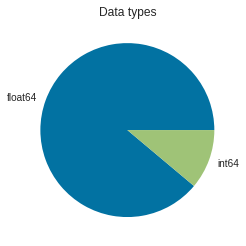

In [24]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [25]:
display(df.describe().T)

count        mean         std         min         25%  \
Cement             988.0  280.736063  104.520393  102.000000  192.000000   
BlastFurnaceSlag   973.0   73.633515   86.586068    0.000000    0.000000   
FlyAsh            1030.0   54.187136   63.996469    0.000000    0.000000   
Water             1030.0  181.566359   21.355567  121.750000  164.900000   
Superplasticizer  1030.0    6.203112    5.973492    0.000000    0.000000   
CoarseAggregate   1030.0  972.918592   77.753818  801.000000  932.000000   
FineAggregate     1030.0  773.578883   80.175427  594.000000  730.950000   
Age               1030.0   45.662136   63.169912    1.000000    7.000000   
Strength          1030.0   35.817836   16.705679    2.331808   23.707115   

                         50%          75%          max  
Cement            272.800000   350.000000   540.000000  
BlastFurnaceSlag   22.000000   142.500000   359.400000  
FlyAsh              0.000000   118.270000   200.100000  
Water             185.000000   192.000000   247.000000  
Superplasticizer    6.350000    10.160000    32.200000  
CoarseAggregate   968.000000  1029.400000  1145.000000  
FineAggregate     779.510000   824.000000   992.600000  
Age                28.000000    56.000000   365.000000  
Strength           34.442774    46.136287    82.599225

#### Which columns could be categorical ?

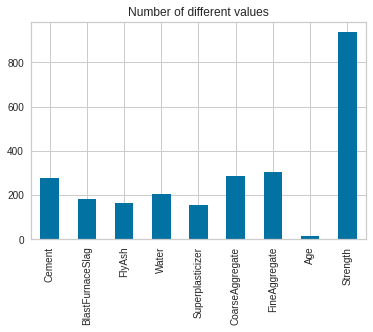

In [26]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [27]:
duplicates(df)

Number of rows before removing: 988
Number of duplicate rows: 21
Number of rows after removing: 967


Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  \
0      540.0               0.0     0.0  162.0               2.5   
1      540.0               0.0     0.0  162.0               2.5   
2      332.5             142.5     0.0  228.0               0.0   
3      332.5             142.5     0.0  228.0               0.0   
4      198.6               NaN     0.0  192.0               0.0   
...      ...               ...     ...    ...               ...   
1025   276.4             116.0    90.3  179.6               8.9   
1026   322.2               0.0   115.6  196.0              10.4   
1027   148.5             139.4   108.6  192.7               6.1   
1028   159.1             186.7     0.0  175.6              11.3   
1029   260.9             100.5    78.3  200.6               8.6   

      CoarseAggregate  FineAggregate  Age   Strength  
0              1040.0          676.0   28  79.986111  
1              1055.0          676.0   28  61.887366  
2               932.0          594.0  270  40.269535  
3               932.0          594.0  365  41.052780  
4               978.4          825.5  360  44.296075  
...               ...            ...  ...        ...  
1025            870.1          768.3   28  44.284354  
1026            817.9          813.4   28  31.178794  
1027            892.4          780.0   28  23.696601  
1028            989.6          788.9   28  32.768036  
1029            864.5          761.5   28  32.401235  

[1009 rows x 9 columns]

#### Drop NaN:

In [28]:
df, drop_cols = drop_na(df, threshold_NaN)

Drop columns containing more than 50.0 % of NaN: []


Set of dropped columns: NaN

In [29]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [30]:
display(dropped_cols)

array([], dtype=object)

#### Encoding data:

In [31]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Cement
Encoding numeric column: BlastFurnaceSlag
Encoding numeric column: FlyAsh
Encoding numeric column: Water
Encoding numeric column: Superplasticizer
Encoding numeric column: CoarseAggregate
Encoding numeric column: FineAggregate
Encoding numeric column: Age
Encoding numeric column: Strength


#### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


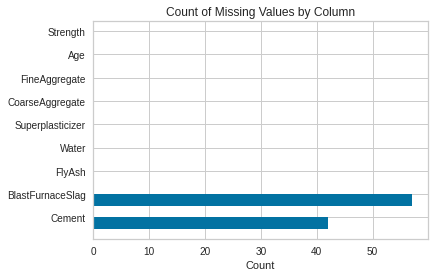

In [32]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [33]:
df = imputation(df)

Imputing NaN using IterativeImputer


#### Data compression:

In [34]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.07MB
Memory usage after optimization is: 0.02MB
Decreased by 74.9%


##### Dataframe structure after compression

In [35]:
plot_dataframe_structure(df)

#### Outliers:

In [36]:
df = outliers(df, threshold_Z)

Using Z_score,  49  rows will be suppressed.


### Plottings

#### Ranking 

##### Ranking 1D 

In [37]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

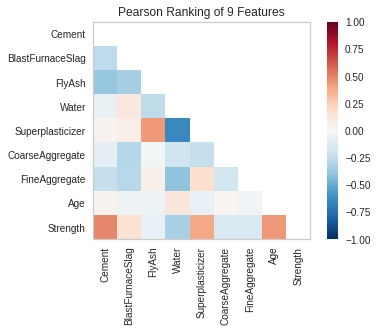

In [38]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

In [39]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

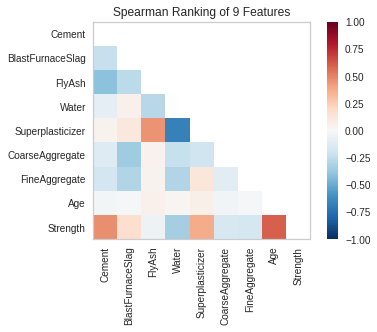

In [40]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

In [41]:
rank2d(df, algorithm='kendalltau');

#### Correlation

In [42]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [43]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Splitting dataframe in features and targets

In [44]:
y = df[target_col]

In [45]:
X = df.drop(target_col, axis=1)

###### Correlation with Yellow Bricks

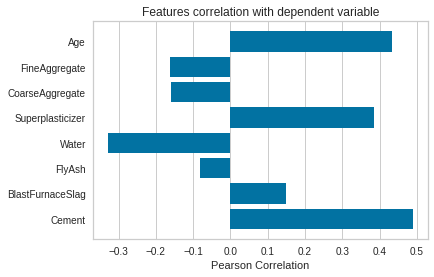

In [46]:
feature_correlation(X, y);

In [47]:
feature_correlation(X, y, method='mutual_info-regression');

###### Correlation with Seaborn

In [48]:
plot_sns_corr_regre(df, target_col)

###### Heatmap with Seaborn

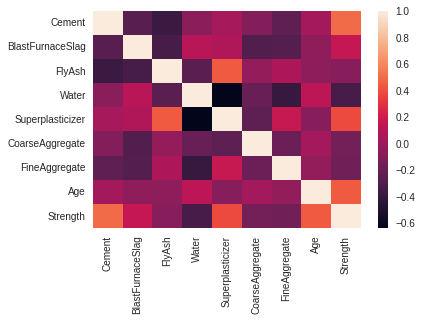

In [49]:
plt.figure()
sns.heatmap(df.corr())
plt.show()

#### Feature importance (a priori)

##### According to decision tree

In [50]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

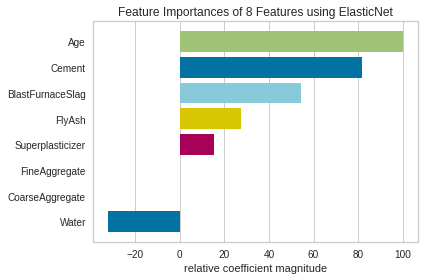

In [51]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

#### Check columns that should be dropped

In [52]:
print(dropped_cols)

[]


## Splittings 

In [53]:
df = df_copy

#### Splitting dataframe in features and targets

In [54]:
y = df[target_col]

In [55]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [56]:
nb_features = len(X.columns.tolist())

In [57]:
nb_targets = 1

In [58]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [59]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [60]:
cat_selector = make_column_selector(dtype_include=object)

In [61]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [62]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [63]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=0, add_indicator=True))

In [64]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [65]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [66]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=0, add_indicator=True), StandardScaler())

In [67]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Keras neural network definition

In [68]:
def K_Regre(): 
    keras.backend.clear_session()
#   neural network architecture: start  
    model = Sequential() 
    model.add(Dense(10 * layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(1)) 
#   neural network architecture: end   
    model.compile(loss='mean_squared_error', optimizer='adam') 
    return model


##### Early Stopping

In [69]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

In [70]:
K_R = KerasRegressor(K_Regre, batch_size=64, epochs=2000, callbacks=[es], validation_split=0.1, verbose=1) 
K_R._estimator_type = 'regressor'

##### Level-0 models

In [71]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel()))), 
          ('DTRF', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='friedman_mse'))), 
          ('DTRA', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='absolute_error'))), 
          ('DTRP', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='poisson'))), 
          ('RFRS', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='squared_error', n_estimators=50))), 
          ('RFRA', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='absolute_error', n_estimators=50))), 
          ('RFRP', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='poisson', n_estimators=50))), 
          ('ABR', make_pipeline(tree_preprocessor, AdaBoostRegressor())), 
          ('HGBR', make_pipeline(tree_preprocessor, HistGradientBoostingRegressor(early_stopping=True))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR10', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (10 * layer_size, 10 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('MLPR20', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (20 * layer_size, 20 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ('KERR', make_pipeline(ntree_preprocessor, K_R)), 
          ]

##### Level-1 model

In [72]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Stacking for regression

In [73]:
model = StackingRegressor(level_0, final_estimator=level_1)

### Model fitting

In [74]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

2022-07-13 16:44:57.651699: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-13 16:44:57.651726: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-13 16:44:57.651751: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-07-13 16:44:57.652028: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2000
10/10 [==============================] - 2s 31ms/step - loss: 1546.7703 - val_loss: 1488.4308
Epoch 2/2000
10/10 [==============================] - 0s 8ms/step - loss: 1523.2363 - val_loss: 1487.3821
Epoch 3/2000
10/10 [==============================] - 0s 8ms/step - loss: 1509.8419 - val_loss: 1484.5350
Epoch 4/2000
10/10 [==============================] - 0s 7ms/step - loss: 1500.2212 - val_loss: 1479.5779
Epoch 5/2000
10/10 [==============================] - 0s 7ms/step - loss: 1485.0131 - val_loss: 1475.9579
Epoch 6/2000
10/10 [==============================] - 0s 7ms/step - loss: 1475.3334 - val_loss: 1471.1151
Epoch 7/2000
10/10 [==============================] - 0s 8ms/step - loss: 1474.1270 - val_loss: 1465.8740
Epoch 8/2000
10/10 [==============================] - 0s 8ms/step - loss: 1457.1189 - val_loss: 1458.0203
Epoch 9/2000
10/10 [==============================] - 0s 7ms/step - loss: 1439.0146 - val_loss: 1450.0950
Epoch 10/2000
10/10 [========================

StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                                    random_state=0)),
                                                                                                                  ('standardscaler',
                                                                                                                   StandardScaler())]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2f584...
                                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                                  ('onehotencoder',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse=False))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2f5a768ac0>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('kerasregressor',
                                                <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f2f58491690>)]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1))

### Model evaluation

#### Model scoring

6/6 [==============================] - 0s 3ms/step


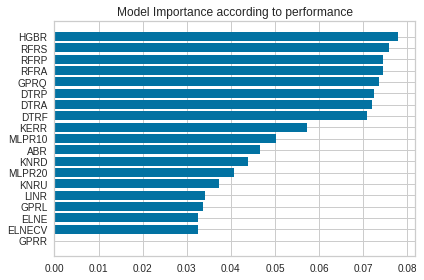

In [75]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

In [76]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

In [77]:
plot_perm_importance(model, X_test, y_test)

6/6 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: ram://c233487f-cb36-4ed2-8442-06c559968dd3/assets
INFO:tensorflow:Assets written to: ram://6fd7fe82-ca94-47c4-ad3e-1568f3e8d50a/assets


2022-07-13 16:49:06.235843: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-13 16:49:06.235870: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


INFO:tensorflow:Assets written to: ram://1eb5d495-41d6-46ca-9ca8-7616ff8d38ad/assets


2022-07-13 16:49:08.482665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-13 16:49:08.482706: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-13 16:49:08.482734: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-07-13 16:49:08.482998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-13 16:49:09.544555: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

6/6 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: ram://d9183019-c67b-4474-a3c5-8009e9dbf9c8/assets


2022-07-13 16:49:12.730439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-13 16:49:12.730506: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


6/6 [==============================] - 0s 3ms/step


2022-07-13 16:49:13.147916: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-13 16:49:13.147979: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-13 16:49:13.159358: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-07-13 16:49:13.159955: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: ram://9feb4495-699d-48b9-88fc-098be2fd70e2/assets
6/6 [==============================] - 0s 3ms/step


2022-07-13 16:49:17.118633: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-13 16:49:17.118699: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-13 16:49:17.223395: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-13 16:49:17.231500: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-13 16:49:17.231739: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-07-13 16:49:17.232299: I tensorflow/core/platform/cpu_fe

6/6 [==============================] - 0s 5ms/step
INFO:tensorflow:Assets written to: ram://72e6d959-4a89-48ac-afdb-89f0e0307194/assets
6/6 [==============================] - 0s 3ms/step


2022-07-13 16:49:21.624184: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-13 16:49:21.624228: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-13 16:49:21.624262: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-07-13 16:49:21.625053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://6881d7d0-5d81-4aeb-bf0d-37d8d44c0ca3/assets
6/6 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://7995530e-a2ec-4f2b-a282-7e170d0807d6/assets
6/6 [==============================] - 0s 1ms/step


array([['FlyAsh', 0.01134076992890133],
       ['CoarseAggregate', 0.012554917549344046],
       ['FineAggregate', 0.030674644250500465],
       ['Superplasticizer', 0.03687469881388671],
       ['BlastFurnaceSlag', 0.07940821592750034],
       ['Water', 0.10345079194939467],
       ['Cement', 0.31767306721492145],
       ['Age', 0.4080228943655511]], dtype=object)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [78]:
features_of_interest = []

INFO:tensorflow:Assets written to: ram://3b0b142e-2b7d-4a81-bf50-f04dfbe0dbf0/assets
6/6 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://32afb122-2a5f-468b-962e-387170c19ba1/assets
6/6 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://6adad6a4-6bd7-473e-9074-76a9dd10ad24/assets
6/6 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: ram://f520d24f-b0de-4de4-a0b2-1f9fb7e907d1/assets
6/6 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: ram://d956649e-04c9-4efd-b89d-08333218cdd7/assets
6/6 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: ram://035737e3-77cb-4479-822a-a0fe714c02ca/assets
6/6 [==============================] - 0s 4ms/step
INFO:tensorflow:Assets written to: ram://9078c703-3f28-44cf-8c36-06bfb94c52de/assets
6/6 [==============================] - 0s 4ms/step
INFO:tensorflow:Assets written to: ram://70d0012

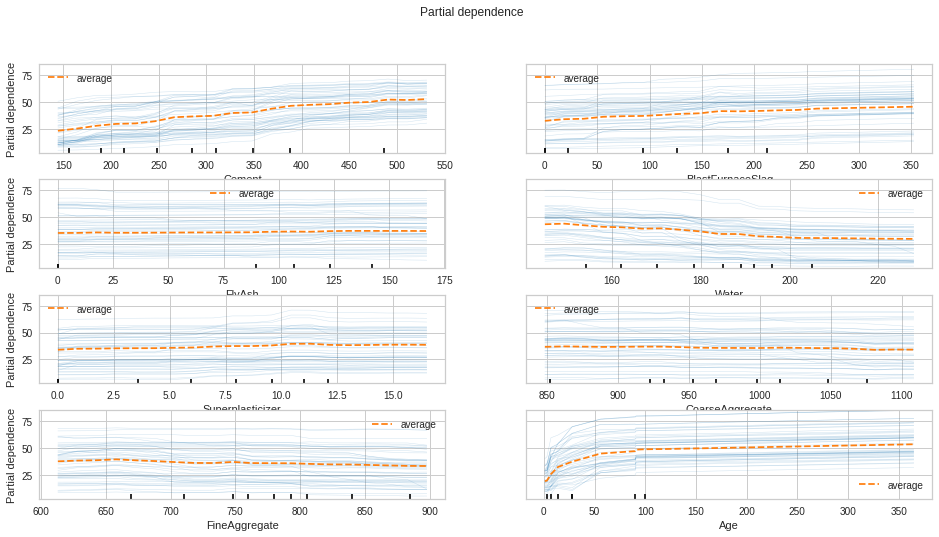

In [79]:
plot_partial_dependence(model, X_test, features_of_interest)

#### Residuals plot

6/6 [==============================] - 0s 2ms/step


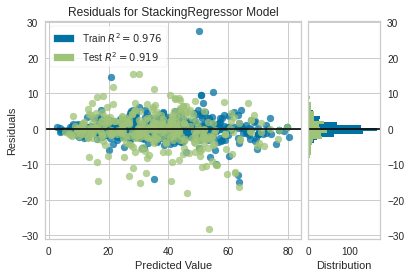

In [80]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Prediction error

6/6 [==============================] - 0s 2ms/step


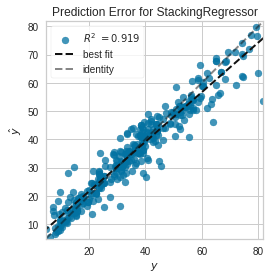

In [81]:
prediction_error(model, X_train, y_train, X_test, y_test);

### Final Model

In [82]:
threshold_model = 5

In [83]:
threshold_score = 0.7

##### Filtered Level-0 models

In [84]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [85]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Build final model

In [86]:
model = StackingRegressor(level_0_f, final_estimator=level_1)

### Final Model fitting

In [87]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 13 s, sys: 126 ms, total: 13.1 s
Wall time: 6.66 s


StackingRegressor(estimators=[('DTRA',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                                    random_state=0))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2f5844c910>),
                                                                                                 ('pipeline-2',
                                                                                                  Pipeline(steps...
                                                                                                                  ('ordinalencoder',
                                                                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                                  unknown_value=-1))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2f5a768ac0>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('histgradientboostingregressor',
                                                HistGradientBoostingRegressor(early_stopping=True))]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1))

#### Final Model scoring

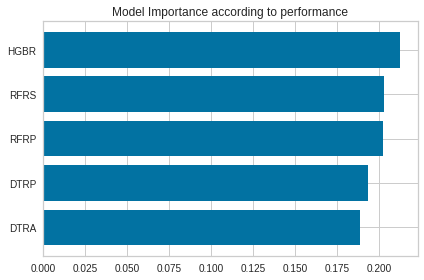

(array([['DTRA', 0.9935991217067399, 0.8067027793167899],
        ['DTRP', 0.9955792481375256, 0.8279903464328291],
        ['RFRS', 0.97735909447807, 0.8682785407234348],
        ['RFRP', 0.9780448521602059, 0.8646979009101151],
        ['HGBR', 0.9731187720087032, 0.9079890143674211],
        ['Stack', 0.9815117386360245, 0.9172355322252892]], dtype=object),
 array([['DTRA', 0.1886733385962965],
        ['DTRP', 0.19365211945754182],
        ['RFRP', 0.20223735931601922],
        ['RFRS', 0.2030748068682168],
        ['HGBR', 0.2123623757619257]], dtype=object))

In [88]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

In [89]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [90]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [91]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [92]:
print(dropped_cols)

['CoarseAggregate', 'FlyAsh', 'Superplasticizer']


#### Final Residuals plot

In [93]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Final Prediction error

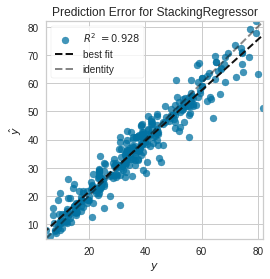

In [94]:
prediction_error(model, X_train, y_train, X_test, y_test);

## Deployment

### Save your model

In [95]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [96]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)